<a href="https://colab.research.google.com/github/Tbharvesh/MachineLearningModels/blob/main/SVM_%26_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [ ]:
df["Age"].fillna(df.Age.mean(), inplace = True)

In [ ]:
df=df.drop(['Name', 'SibSp','Parch','Ticket','Embarked'], axis=1)

In [ ]:
df1= df.drop(['PassengerId','Pclass','Sex','Age','Fare','Cabin'],axis=1)
df1

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
df2=df.drop(['Survived','Cabin'],axis=1)
df2

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,0,22.000000,7.2500
1,2,1,1,38.000000,71.2833
2,3,3,1,26.000000,7.9250
3,4,1,1,35.000000,53.1000
4,5,3,0,35.000000,8.0500
...,...,...,...,...,...
886,887,2,0,27.000000,13.0000
887,888,1,1,19.000000,30.0000
888,889,3,1,29.699118,23.4500
889,890,1,0,26.000000,30.0000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df2,df1,test_size=0.2)

In [ ]:
y_train

,Survived
18,0
661,0
145,0
756,0
5,0
...,...
76,0
135,0
751,1
137,0


In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)   #fit func used to  train the model
model.score(X_test,y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7039106145251397

In [ ]:
model.score(X_test,y_test)

0.7039106145251397

In [ ]:
# svm :creates a hyperplane
# hyperplane and the nearest point connect to it ,there is a margin nad the nearest point is Support vector
# SVM:plots the hyperplane which gives best classification

In [ ]:
from sklearn.metrics import confusion_matrix

y_predict=model.predict(X_test)
cm = confusion_matrix(y_test,y_predict,labels=model.classes_)

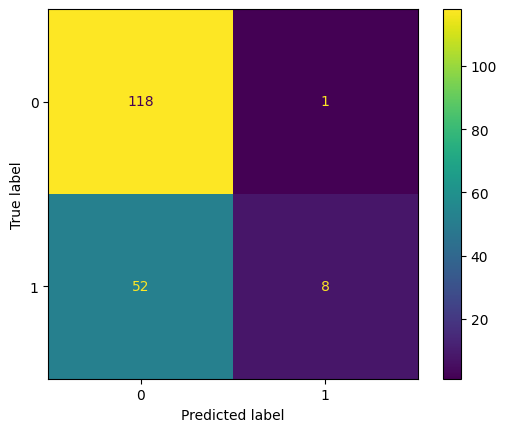

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
#1
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.99      0.82       119
           1       0.89      0.13      0.23        60

    accuracy                           0.70       179
   macro avg       0.79      0.56      0.52       179
weighted avg       0.76      0.70      0.62       179



In [ ]:
# kernel : linear : for 1d data , poly : , rbf(default) :infinite dimensional
# gamma :
# c:defined decision boundary
#How to improve the accuracy?
from sklearn import svm
model=svm.SVC(kernel="linear",gamma='auto',C=2)
model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2, gamma='auto', kernel='linear')

In [ ]:
y_predict =model.predict(X_test)
model.score(X_test,y_test)
model.score(X_train,y_train)

0.7851123595505618

In [ ]:
#2
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))
# accuracy is increased to 78%

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       119
           1       0.68      0.68      0.68        60

    accuracy                           0.79       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[0.1,1,0.01,0.001,1000],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV
y_train=y_train.values.ravel()
grid=GridSearchCV(model,param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.601 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(C=2, gamma='auto', kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 1, 0.01, 0.001, 1000],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
#3
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103  16]
 [ 41  19]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.78       119
           1       0.54      0.32      0.40        60

    accuracy                           0.68       179
   macro avg       0.63      0.59      0.59       179
weighted avg       0.66      0.68      0.65       179



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred= classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test,y_pred,labels=model.classes_)

In [ ]:
cm

array([[101,  18],
       [ 18,  42]])

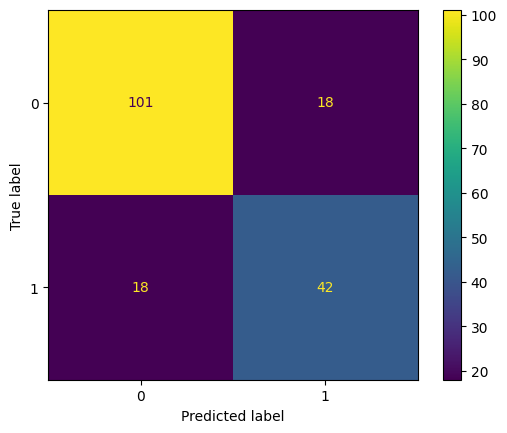

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       119
           1       0.70      0.70      0.70        60

    accuracy                           0.80       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792307f58550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792307f3c5e0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 370}


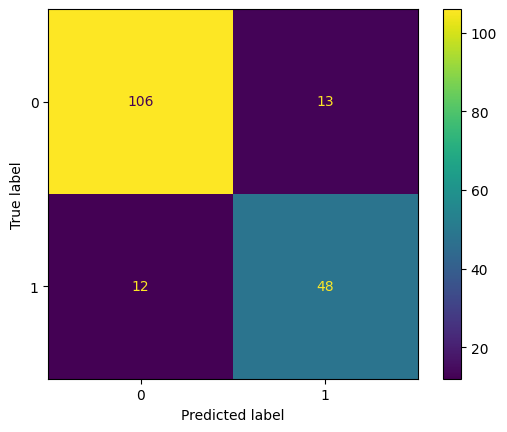

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();